In [1]:
corpus = "Tests conducted by the FAA use planes with a 31 inch pitch between each row of seats. Many economy seats on United Airlines have 30 inches of space. Some airlines offer as little as 28 inches between each row of seats."

In [2]:
import spacy
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from spacy import displacy
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

# Load larger spaCy model
nlp = spacy.load("en_core_web_lg")
text3= nlp(corpus)
displacy.render(text3,style="ent",jupyter=True)

/Users/bhavanbhatt/miniforge3/envs/exp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
summaries = pd.read_csv('CoD/summaries.csv')

In [4]:
summaries

,text,Summary 1,Summary 2,Summary 3,Summary 4,time
0,We're not sure what was on the menu for Robin ...,This article discusses the events following a ...,After Mexico's 3-2 win over Holland spearheade...,Carlos Vela's two goals led Mexico to a 3-2 vi...,"In a gripping match, Carlos Vela's twin strike...",126.125805
1,We are used to seeing celebrities airbrushed t...,Delving into the often turbulent realm of cele...,"Within the challenging sphere of body shaming,...",Model Chrissy Teigen and singer Pink openly re...,"Celebrities including Chrissy Teigen, Pink, an...",85.315515
2,"ROCKWOOD, Pennsylvania (CNN) -- Four generatio...",Interlacing an intricate narrative anchored in...,Pennsylvania farmer Shawn Saylor transforms co...,"Shawn Saylor, a farmer from Pennsylvania, harn...",Shawn Saylor's Pennsylvania farm generates ele...,52.281474
3,"(CNN)You ""Better Call Saul,"" but only if you k...",This article discusses the unveiling of an ant...,The network AMC unveiled the extensive trailer...,AMC's new series 'Better Call Saul' featuring ...,Bob Odenkirk reprises his role as 'Breaking Ba...,75.287421
4,"MADRID, Spain (CNN) -- A Spaniard has died fr...",The given article serves as a detailed narrati...,A Spaniard has died from the human form of mad...,The human form of mad cow disease claimed a fi...,"A woman in Santander, Spain succumbed to the h...",70.688996
...,...,...,...,...,...,...
95,A three-month-old baby boy was found dead afte...,This article discusses the tragic incident inv...,"Angela Williams' 3-month-old son, Bobby Blakem...","Angela Williams found her 3-month-old son, Bob...","Angela Williams, a mother-of-four, found her 3...",74.568108
96,(CNN) -- New guidelines for the management of ...,This article discusses the intricate topic of ...,Revised hypertension management guidelines sug...,The Journal of the American Medical Associatio...,The Journal of the American Medical Associatio...,68.320899
97,A father-of-five has been stabbed to death at ...,The article primarily delves into the account ...,"Father-of-five and volunteer wrestling coach, ...","Peter Kelly, father of five and wrestling coac...","Peter Kelly, father of five, Andersen Windows ...",71.599283
98,"By . Bianca London . PUBLISHED: . 18:48 EST, 1...",This article discusses an intriguing collabora...,Disney and Harrods have announced a collaborat...,"In a unique collaboration, Disney and Harrods ...","Disney and Harrods, in a unique collaboration,...",71.905709


In [5]:
summaries['density1'] = np.zeros(summaries.shape[0])
summaries['density2'] = np.zeros(summaries.shape[0])
summaries['density3'] = np.zeros(summaries.shape[0])
summaries['density4'] = np.zeros(summaries.shape[0])

In [6]:
for j in range(1,5):
    for i in range(summaries.shape[0]):
        corpus = summaries.iloc[i,j]
        tokens_nltk = word_tokenize(corpus)
        token_counts_nltk = Counter(tokens_nltk)
        doc = nlp(corpus)
        entity_counts_spacy = Counter([ent.label_ for ent in doc.ents])
        density = len(entity_counts_spacy)/len(token_counts_nltk)
        summaries[f'density{j}'].loc[i] = density
        print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46

In [7]:
summaries.to_excel("CoD-summaries.xlsx")

In [8]:
summaries

,text,Summary 1,Summary 2,Summary 3,Summary 4,time,density1,density2,density3,density4
0,We're not sure what was on the menu for Robin ...,This article discusses the events following a ...,After Mexico's 3-2 win over Holland spearheade...,Carlos Vela's two goals led Mexico to a 3-2 vi...,"In a gripping match, Carlos Vela's twin strike...",126.125805,0.013699,0.043478,0.080645,0.085714
1,We are used to seeing celebrities airbrushed t...,Delving into the often turbulent realm of cele...,"Within the challenging sphere of body shaming,...",Model Chrissy Teigen and singer Pink openly re...,"Celebrities including Chrissy Teigen, Pink, an...",85.315515,0.028169,0.033333,0.049180,0.034483
2,"ROCKWOOD, Pennsylvania (CNN) -- Four generatio...",Interlacing an intricate narrative anchored in...,Pennsylvania farmer Shawn Saylor transforms co...,"Shawn Saylor, a farmer from Pennsylvania, harn...",Shawn Saylor's Pennsylvania farm generates ele...,52.281474,0.000000,0.042857,0.071429,0.079365
3,"(CNN)You ""Better Call Saul,"" but only if you k...",This article discusses the unveiling of an ant...,The network AMC unveiled the extensive trailer...,AMC's new series 'Better Call Saul' featuring ...,Bob Odenkirk reprises his role as 'Breaking Ba...,75.287421,0.000000,0.048193,0.052632,0.059701
4,"MADRID, Spain (CNN) -- A Spaniard has died fr...",The given article serves as a detailed narrati...,A Spaniard has died from the human form of mad...,The human form of mad cow disease claimed a fi...,"A woman in Santander, Spain succumbed to the h...",70.688996,0.000000,0.088235,0.101695,0.115385
...,...,...,...,...,...,...,...,...,...,...
95,A three-month-old baby boy was found dead afte...,This article discusses the tragic incident inv...,"Angela Williams' 3-month-old son, Bobby Blakem...","Angela Williams found her 3-month-old son, Bob...","Angela Williams, a mother-of-four, found her 3...",74.568108,0.016949,0.059701,0.072727,0.045455
96,(CNN) -- New guidelines for the management of ...,This article discusses the intricate topic of ...,Revised hypertension management guidelines sug...,The Journal of the American Medical Associatio...,The Journal of the American Medical Associatio...,68.320899,0.014085,0.065574,0.062500,0.064516
97,A father-of-five has been stabbed to death at ...,The article primarily delves into the account ...,"Father-of-five and volunteer wrestling coach, ...","Peter Kelly, father of five and wrestling coac...","Peter Kelly, father of five, Andersen Windows ...",71.599283,0.029851,0.073529,0.075758,0.076923
98,"By . Bianca London . PUBLISHED: . 18:48 EST, 1...",This article discusses an intriguing collabora...,Disney and Harrods have announced a collaborat...,"In a unique collaboration, Disney and Harrods ...","Disney and Harrods, in a unique collaboration,...",71.905709,0.030769,0.071429,0.049180,0.066667


In [17]:
density1_mean = summaries['density1'].mean()
density2_mean = summaries['density2'].mean()
density3_mean = summaries['density3'].mean()
density4_mean = summaries['density4'].mean()

In [23]:
density4_mean

0.06810751968905376

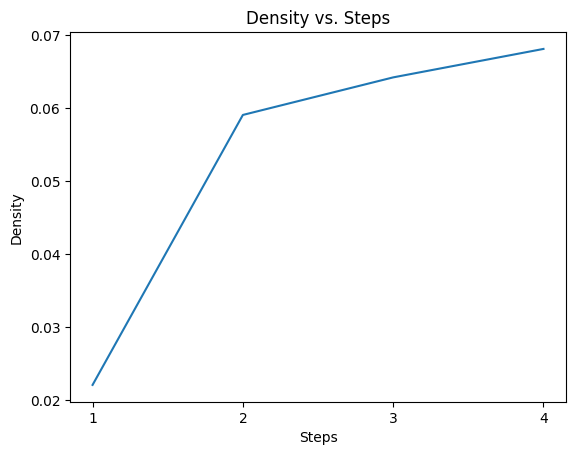

In [22]:
import matplotlib.pyplot as plt

density = [density1_mean, density2_mean, density3_mean, density4_mean]
steps = [1, 2, 3, 4]

plt.plot(steps, density)
plt.xlabel('Steps')
plt.ylabel('Density')
plt.xticks(steps)
plt.title('Density vs. Steps')
plt.show()
